# Activity: Build an XGBoost model

## Introduction

In this activity, you’ll build on the skills and techniques you learned in the decision tree and random forest lessons to construct your own XGBoost classification model. The XGBoost model is a very powerful extension of decision trees, so having a strong working familiarity with this process will strengthen your skills and resume as a data professional.

This activity is a continuation of the airlines project in which you built decision tree and random forest models. You will use the same data, but this time you will train, tune, and evaluate an XGBoost model. You’ll then compare the performance of all three models and decide which model is best. Finally, you’ll explore the feature importances of your model and identify the features that most contribute to customer satisfaction.


## Step 1: Imports

### Import packages

Begin with your import statements. First, import `pandas`, `numpy`, and `matplotlib` for data preparation. Next, import scikit-learn (`sklearn`) for model preparation and evaluation. Then, import `xgboost`, which provides the classification algorithm you'll implement to formulate your predictive model.

In [28]:
# Import relevant libraries and modules.

### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV

### Load the dataset

To formulate your model, `pandas` is used to import a csv of airline passenger satisfaction data called `Invistico_Airline.csv`. This DataFrame is called `airline_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [15]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###

airline_data = pd.read_csv('Invistico_Airline.csv', error_bad_lines=False)

### Display the data

Examine the first 10 rows of data to familiarize yourself with the dataset.

In [16]:
# Display the first ten rows of data.

### YOUR CODE HERE ###
airline_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Display the data type for each column

Next, observe the types of data present within this dataset.

In [17]:
# Display the data type for each column in your DataFrame.
### YOUR CODE HERE ###
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the methods for exploring DataFrames.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Recall a property of a `pandas` DataFrame that allows you to view the data type for each column.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `.dtypes` on your DataFrame `airline_data` to view the data type of each column.</details>

**Question:** Identify the target (or predicted) variable for passenger satisfaction. What is your initial hypothesis about which variables will be valuable in predicting satisfaction?

I think most (if not all) variables will aid in the prediction, but some variables like Type of Travel may have a weak effect.

## Step 2: Model preparation

Before you proceed with modeling, consider which metrics you will ultimately want to leverage to evaluate your model.

**Question:** Which metrics are most suited to evaluating this type of model?

I plan to look at precision, recall, F1 score, and accuracy.

### Prepare your data for predictions

You may have noticed when previewing your data that there are several non-numerical variables (`object` data types) within the dataset.

To prepare this DataFrame for modeling, first convert these variables into a numerical format.

In [18]:
# Convert the object predictor variables to numerical dummies.
### YOUR CODE HERE ###
numeric_df = pd.get_dummies(airline_data, columns=['Customer Type', 'Type of Travel', 'Class'], drop_first=True)
numeric_df.head(10)

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,satisfied,65,265,0,0,0,2,2,4,2,...,3,5,3,2,0,0.0,0,1,1,0
1,satisfied,47,2464,0,0,0,3,0,2,2,...,4,2,3,2,310,305.0,0,1,0,0
2,satisfied,15,2138,0,0,0,3,2,0,2,...,4,4,4,2,0,0.0,0,1,1,0
3,satisfied,60,623,0,0,0,3,3,4,3,...,1,4,1,3,0,0.0,0,1,1,0
4,satisfied,70,354,0,0,0,3,4,3,4,...,2,4,2,5,0,0.0,0,1,1,0
5,satisfied,30,1894,0,0,0,3,2,0,2,...,5,5,4,2,0,0.0,0,1,1,0
6,satisfied,66,227,0,0,0,3,2,5,5,...,5,5,5,3,17,15.0,0,1,1,0
7,satisfied,10,1812,0,0,0,3,2,0,2,...,4,5,4,2,0,0.0,0,1,1,0
8,satisfied,56,73,0,0,0,3,5,3,5,...,1,5,4,4,0,0.0,0,1,0,0
9,satisfied,22,1556,0,0,0,3,2,0,2,...,5,3,4,2,30,26.0,0,1,1,0


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about feature engineering](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/5mEqu/introduction-to-feature-engineering).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pandas` function for transforming categorical data into "dummy" variables.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `get_dummies()` function on your DataFrame `airline_data` to create dummies for the categorical variables in your dataset. Note that your target variable will also need this treatment.</details>

### Isolate your target and predictor variables
Separately define the target variable (`satisfaction`) and the features.

In [19]:
# Drop rows with NaN
numeric_df = numeric_df.dropna(axis=0)

# Define the y (target) variable.
### YOUR CODE HERE ###
df_y = numeric_df['satisfaction'].map({'dissatisfied':0, 'satisfied':1})

# Define the X (predictor) variables.
### YOUR CODE HERE ###
df_x = numeric_df.drop(['satisfaction'], axis=1)

print(df_y.shape, df_x.shape)
print(df_x.head())

(129487,) (129487, 22)
   Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0   65              265             0                                  0   
1   47             2464             0                                  0   
2   15             2138             0                                  0   
3   60              623             0                                  0   
4   70              354             0                                  0   

   Food and drink  Gate location  Inflight wifi service  \
0               0              2                      2   
1               0              3                      0   
2               0              3                      2   
3               0              3                      3   
4               0              3                      4   

   Inflight entertainment  Online support  Ease of Online booking  ...  \
0                       4               2                       3  ...   
1                

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data into x and y](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

In `pandas`, use square brackets `[]` to subset your DataFrame by specifying which column(s) to select. Also, quickly subset a DataFrame to exclude a particular column by using the `drop()` function and specifying the column to drop.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

In this case, your target variable was split into two columns from the dummy split. Be sure to include only the column which assigns a positive (i.e., "satisfied") outcome as 1.
</details>

### Divide your data 

Divide your data into a training set (75% of the data) and test set (25% of the data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not used to test how well the model generalizes (or performs) on new data.

In [20]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, stratify=df_y, test_size=0.25, random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data between a training and test set](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

To perform the splitting, call the function in the `model_selection` module of `sklearn` on the features and target variable.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `train_test_split()` function, passing in both `features` and `target`, while configuring the appropriate `test_size`. Assign the output of this split as `X_train`, `X_test`, `y_train`, `y_test`.
</details>

## Step 3: Model building

### "Instantiate" your XGBClassifer

Before you fit your model to your airline dataset, first create the XGB Classifier model and define its objective. You'll use this model to fit and score different hyperparameters during the GridSearch cross-validation process.

In [21]:
# Define xgb to be your XGBClassifier.
### YOUR CODE HERE ###
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a classifier model from `xgboost`](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Note that the target variable in this case is a binary variable. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `XGBClassifier()` from `xgboost`. Set the objective as `binary:logistic`.
</details>

### Define the parameters for hyperparameter tuning

To identify suitable parameters for your `xgboost` model, first define the parameters for hyperparameter tuning. Specifically, consider tuning `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`, `subsample`, and/or `colsample_bytree`.

Consider a more limited range for each hyperparameter to allow for timely iteration and model training. For example, using a single possible value for each of the six hyperparameters listed above will take approximately one minute to run on this platform.

```
{
    'max_depth': [4],
    'min_child_weight': [3],
    'learning_rate': [0.1],
    'n_estimators': [5],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}
```

If you add just one new option, for example by changing `max_depth: [4]` to `max_depth: [3, 6]`, and keep everything else the same, you can expect the run time to approximately double. If you use two possibilities for each hyperparameter, the run time would extend to ~1 hour. 
         

In [22]:
# Define parameters for tuning as `cv_params`.
### YOUR CODE HERE ###
cv_params = {'max_depth':[2, 4, 6],
            'min_child_weight':[3],
            'learning_rate':[0.1, 0.2, 0.3],
            'n_estimators':[5, 10, 15],   # this was initially set to [10, 50, 100], but it was taking way too long to fit.
            'subsample':[0.7],
            'colsample_bytree':[0.7]}

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about hyperparameter tuning using GridSearch cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider a range of values for each parameter, similar to what you observed in the lesson. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define these parameters using a Python dictionary in the following format: `{'parameter1': [range,of,values]}`</details>

**Question:** What is the likely effect of adding more estimators to your GridSearch?

The runtime/training time will be longer, but more n_estimators should reduce model variance and overfitting.

### Define how the models will be evaluated

Define how the models will be evaluated for hyperparameter tuning. To yield the best understanding of model performance, utilize a suite of metrics.

In [23]:
# Define your criteria as `scoring`.
### YOUR CODE HERE ###
scoring = {'precision', 'recall', 'f1', 'accuracy'}

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about [using metric evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree) to determine the metrics you include.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider what you've learned about the limitations of only including a single metric, such as `accuracy`. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define metrics which balance the false positives and false negatives in binary classification problems.

### Construct the GridSearch cross-validation 

Construct the GridSearch cross-validation using the model, parameters, and scoring metrics you defined. Additionally, define the number of folds and specify *which metric* from above will guide the refit strategy.

In [24]:
# Construct your GridSearch.
### YOUR CODE HERE ###
model = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about constructing a GridSearch for [cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/W4vAW/verify-performance-using-validation).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Balance the time spent on validation with the number of folds you choose. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Choose the refit method which simultaneously balances false positives and false negatives.

### Fit the GridSearch model to your training data

If your GridSearch takes too long, revisit the parameter ranges above and consider narrowing the range and reducing the number of estimators.

**Note:** The following cell might take several minutes to run.

In [25]:
%%time
# fit the GridSearch model to training data
### YOUR CODE HERE ###
clf = model.fit(X_train, y_train)

CPU times: user 52min 14s, sys: 33.9 s, total: 52min 48s
Wall time: 26min 25s


In [27]:
clf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 15,
 'subsample': 0.7}

**Question:** Which optimal set of parameters did the GridSearch yield?

The optimal parameters were learning_rate=0.3, max_depth=6, and n_estimators=15. All other parameters had only one possible value. It is curious that the optimal hyperparameters were the largest values available to the model. This might suggest that extending these upper limits could improve model performance, but I'm not going to do that here because it takes a long time to fit the models.

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about the result of the GridSearch.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Once you've fitted the GridSearch model to your training data, there will be an attribute to access which yields to the optimal parameter set.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Access the `best_params_` attribute from your fitted model. </details>

### Save your model for reference using `pickle`

Use the `pickle` library you've already imported to save the output of this model.

In [29]:
# Use `pickle` to save the trained model.
### YOUR CODE HERE ###
pf = open('trained_fit_XGBoostModel.pickle', 'wb')
pickle.dump(clf, pf)
pf.close()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about "pickling" prior models](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/FSnam/build-and-validate-a-random-forest-model-using-a-validation-data-set).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The model to be pickled is the fitted GridSearch model from above. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `pickle.dump()`, reference the fitted GridSearch model, and provide a name for the pickle file.

## Step 4: Results and evaluation

### Formulate predictions on your test set

To evaluate the predictions yielded from your model, leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction.

First, use your trained model to formulate predictions on your test set.

In [30]:
# Apply your model to predict on your test data. Call this output "y_pred".
### YOUR CODE HERE ###
best_model = clf.best_estimator_
y_pred = best_model.predict(X_test)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about creating predictions from trained models.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the fitted GridSearch model from your training set and predict the predictor variables you reserved in the train-test split.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `predict()` on your fitted model and reference `X_test` to create these predictions.
</details>

### Leverage metrics to evaluate your model's performance

Apply a series of metrics from scikit-learn to assess your model. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [31]:
# 1. Print your accuracy score.
### YOUR CODE HERE ###
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

# 2. Print your precision score.
### YOUR CODE HERE ###
print('Precision:', metrics.precision_score(y_test, y_pred))

# 3. Print your recall score.
### YOUR CODE HERE ###
print('Recall:', metrics.recall_score(y_test, y_pred))

# 4. Print your f1 score.
### YOUR CODE HERE ###
print('F1 score:', metrics.f1_score(y_test, y_pred))

Accuracy: 0.9316075620906956
Precision: 0.9418704051974697
Recall: 0.9326223125105807
F1 score: 0.9372235454236135


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation for detail on these metrics](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `metrics` module in `sklearn` to compute each of these metrics.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()`, passing `y_test` and `y_pred` into each.
</details>

**Question:** How should you interpret your accuracy score?

The accuracy score is the fraction of all data points that were predicted correctly by the model.

**Question:** Is your accuracy score alone sufficient to evaluate your model?

In [32]:
airline_data['satisfaction'].value_counts(normalize=True)

satisfied       0.547328
dissatisfied    0.452672
Name: satisfaction, dtype: float64

Since the target dataset is relatively balanced, I think accuracy is a reasonably good measure of model performance. However, I tend to prefer F1 score because of its ability to handle balanced or imbalanced data.

**Question:** When observing the precision and recall scores of your model, how do you interpret these values, and is one more accurate than the other?

The precision is the fraction of true positives out of all predicted positives. The recall is the fraction of predicted positives out of all actual positives in the observed data. No, I would not say that one is "more accurate" than the other: they simply measure different aspects of model performance. In my case, the precision score was slightly higher than the recall score.

**Question:** What does your model's F1 score tell you, beyond what the other metrics provide?*

The F1 score is the harmonic mean of the precision and recall. This score tells you how well the model balances the tradeoff between false positives and false negatives. The F1 score can be preferable to other scores in many instances as it provides a simple statistic of overall model performance and is not affected by imbalanced data to the same degree as accuracy score.

### Gain clarity with the confusion matrix

Recall that a **confusion matrix** is a graphic that shows a model's true and false positives and true and false negatives. It helps to create a visual representation of the components feeding into the metrics above.

Create a confusion matrix based on your predicted values for the test set.

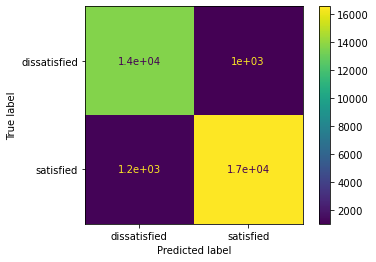

In [33]:
# Construct and display your confusion matrix.
# Construct the confusion matrix for your predicted and test values.
### YOUR CODE HERE ###
cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.
### YOUR CODE HERE ###
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['dissatisfied', 'satisfied'])

# Plot the visual in-line.
### YOUR CODE HERE ###
disp.plot()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the functions in the `metrics` module to create a confusion matrix.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `confusion_matrix`, passing in `y_test` and `y_pred`. Next, utilize `ConfusionMatrixDisplay()` to display your confusion matrix.
</details>

**Question:** When observing your confusion matrix, what do you notice? Does this correlate to any of your other calculations?

The true positives and true negatives are about an order of magnitude higher than the false positives and false negatives. This is consistent with the high values for precision, recall, f1 score, and accuracy.

### Visualize most important features

`xgboost` has a built-in function to visualize the relative importance of the features in the model using `matplotlib`. Output and examine the feature importance of your model.

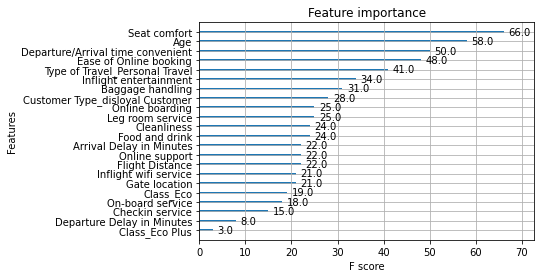

In [34]:
# Plot the relative feature importance of the predictor variables in your model.
### YOUR CODE HERE ###
plot_importance(best_model)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the attributes that are provided once the model is fitted to training data.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Examine the `best_estimator_` attribute of your fitted model.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To easily visualize feature importance, call the built-in `plot_importance` function `xgboost` offers on the `best_estimator_`.</details>

**Question:** Examine the feature importances outputted above. What is your assessment of the result? Did anything surprise you?

Seat comfort is the most important feature, followed by age, a convenient departure/arrival time, and ease of online booking. All of these features make sense as important predictors of customer satisfaction. However, others were a little surprising: Type of Travel (business or personal) ranked higher than expected, whereas Departure Delay ranked much lower than expected (2nd to last).

### Compare models

Create a table of results to compare model performance.

In [ ]:
# Create a table of results to compare model performance.
### YOUR CODE HERE ###

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Create a DataFrame and using the `pd.DataFrame()` function. 

</details>

**Question:** How does this model compare to the decision tree and random forest models you built in previous labs? 

The scores for the XGBoost model are very similar to those of the decision tree and random forest models (present in previous notebooks).

## Considerations

**What are some key takeaways you learned from this lab?**

XGBoost models can have very high performance, but can be expensive to tune and fit. Even with a very limited set of hyperparameters and relatively few n_estimators, the GridSearchCV took a long time to identify an optimal model.

**How would you share your findings with your team?**

I would share the model performance scores, the feature importances and the performance of other models trained on the same dataset.

**What would you share with and recommend to stakeholders?**

The XGBoost model performs very well, with an F1 score of 0.937. The features most important for this model are seat comfort, age, a convenient departure/arrival time, and ease of online booking. While age is set by the user base, improving the other features may lead to significant improvements in customer satisfaction. It may also be worth investigating how and why age is a predictor of satisfaction: perhaps some age groups are better served by our current business model than others, which could leave some age groups more dissatisfied with our services.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged